# ***Implement a linear regression model to predict the prices of houses based on their square footage and the number of bedrooms and bathrooms.***

# Step 1: Import necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 2: Importing the dataset

In [2]:
# Load the data
data = pd.read_csv('train.csv')

# Display the first 5 rows
data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Step 3: Explore and Select Features

In [3]:
# Select relevant features
selected_data = data[['GrLivArea', 'BedroomAbvGr', 'FullBath', 'SalePrice']]

# Check for missing values
selected_data.isnull().sum()


,0
GrLivArea,0
BedroomAbvGr,0
FullBath,0
SalePrice,0


# Step 4: Prepare Data for Modeling

In [4]:
# Features and target
X = selected_data[['GrLivArea', 'BedroomAbvGr', 'FullBath']]
y = selected_data['SalePrice']

# Train-test split (80-20)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Step 5: Train Linear Regression Model



In [5]:
# Initialize model
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Fit on training data
model.fit(X_train, y_train)


LinearRegression()

# Step 6 :Evaluate Model Performance

In [6]:
# Predict on test data
from sklearn.metrics import mean_squared_error, r2_score
y_pred = model.predict(X_test)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)


Mean Squared Error: 2806426667.247853
R^2 Score: 0.6341189942328371


# Step 7: Interpret Model Coefficient

In [7]:
# Coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

# Intercept
print("Intercept:", model.intercept_)


               Coefficient
GrLivArea       104.026307
BedroomAbvGr -26655.165357
FullBath      30014.324109
Intercept: 52261.74862694461


# Step 8 : Plot Actual vs Predicted

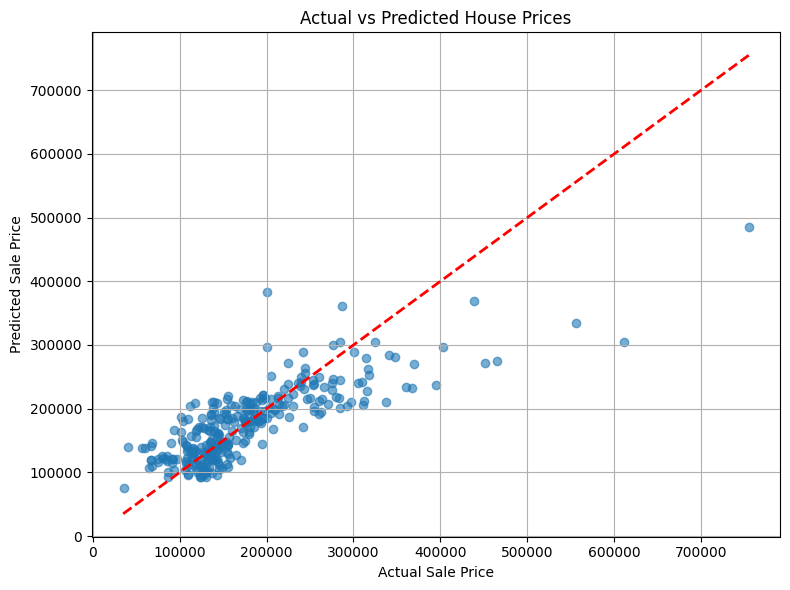

In [8]:

plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--', linewidth=2)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs Predicted House Prices")
plt.grid(True)
plt.tight_layout()
plt.show()

